In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [130]:
df=pd.read_csv('./netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [131]:
df.shape

(8807, 12)

In [132]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [133]:
pd.isnull(df).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [134]:
df.size

105684

In [135]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [137]:
df.duplicated().sum()

0

In [138]:
#to serch particular title is available in this dataset or not so use isin() function
df[df['title'].isin(['Kota Factory'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
#in which year highest number of movies or tv_shows was released

In [139]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [140]:
df['release_year']=pd.to_datetime(df['release_year'], format='%Y')

In [141]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [142]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007-01-01,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018-01-01,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009-01-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006-01-01,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [143]:
df['release_year'].dt.year.value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

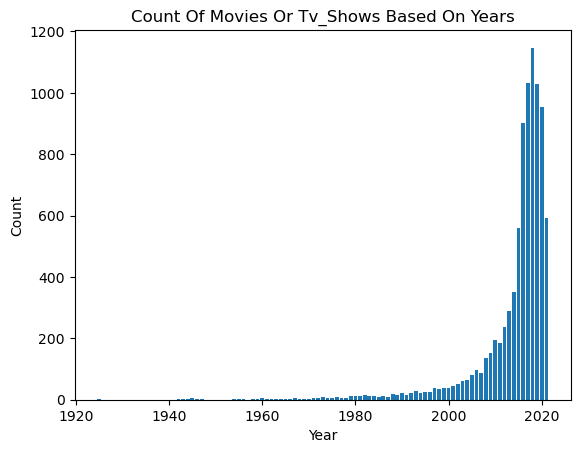

In [144]:
grouped_data=df['release_year'].dt.year.value_counts()
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count Of Movies Or Tv_Shows Based On Years')
plt.show()

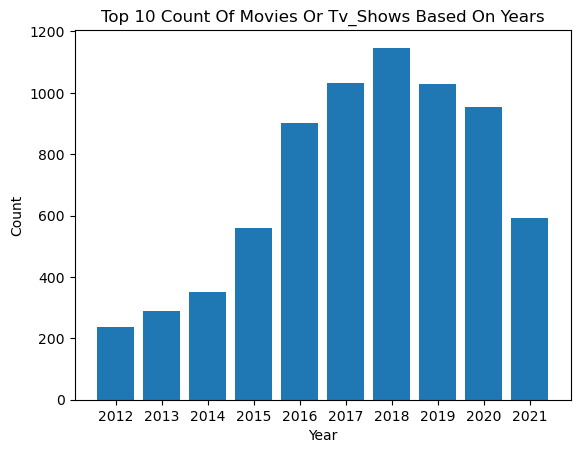

In [145]:
#top 10 Year
grouped_data=df['release_year'].dt.year.value_counts().sort_values(ascending=False)[:10]
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(grouped_data.index)
plt.title('Top 10 Count Of Movies Or Tv_Shows Based On Years')
plt.show()

In [146]:
#how many movies or tvshows 
grouped_data=df.groupby('type')['type'].count()
grouped_data

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

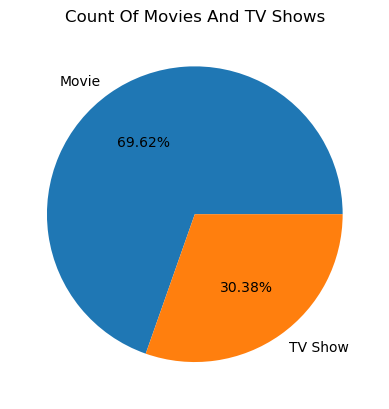

In [147]:
grouped_data=df.groupby('type')['type'].count()
plt.pie(grouped_data.values,labels=grouped_data.index,autopct='%1.2f%%')
plt.title('Count Of Movies And TV Shows') 
plt.show()

In [148]:
df['year']=df['release_year'].dt.year

In [149]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [150]:
# show all tvshows or movies with specific year
df[(df['type']=='Movie') & (df['year']==2018)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018-01-01,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,2018
94,s95,Movie,Show Dogs,Raja Gosnell,"Will Arnett, Ludacris, Natasha Lyonne, Stanley...","United Kingdom, United States","September 8, 2021",2018-01-01,PG,90 min,"Children & Family Movies, Comedies",A rough and tough police dog must go undercove...,2018
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018-01-01,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do...",2018
107,s108,Movie,A Champion Heart,David de Vos,"Mandy Grace, David de Vos, Donna Rusch, Devan ...",United States,"September 4, 2021",2018-01-01,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...,2018
157,s158,Movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,"September 1, 2021",2018-01-01,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,s8707,Movie,We the Animals,Jeremiah Zagar,"Evan Rosado, Josiah Gabriel, Isaiah Kristian, ...",United States,"February 11, 2019",2018-01-01,R,93 min,"Dramas, Independent Movies",A trio of brothers cope with their parents' vo...,2018
8724,s8725,Movie,What Still Remains,Josh Mendoza,"Lulu Antariksa, Colin O'Donoghue, Mimi Rogers,...",United States,"December 21, 2018",2018-01-01,TV-14,91 min,"Dramas, Thrillers","Struggling to survive alone post-apocalypse, a...",2018
8732,s8733,Movie,White Chamber,Paul Raschid,"Shauna MacDonald, Oded Fehr, Amrita Acharia, S...",United Kingdom,"August 1, 2019",2018-01-01,TV-MA,89 min,"Sci-Fi & Fantasy, Thrillers","When a civil war ravages the UK, a scientist a...",2018
8743,s8744,Movie,Wildlife,Paul Dano,"Carey Mulligan, Ed Oxenbould, Bill Camp, Jake ...",United States,"September 1, 2020",2018-01-01,PG-13,105 min,"Dramas, Independent Movies",A teen’s life in 1960 Montana grows complicate...,2018


In [151]:
#only india
df[df['country']=='India']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1998
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021-01-01,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014-01-01,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",2014
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,"September 15, 2021",2014-01-01,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006-01-01,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,2006
8775,s8776,TV Show,Yeh Meri Family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,"August 31, 2018",2018-01-01,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal...",2018
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014-01-01,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2014
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009-01-01,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2009


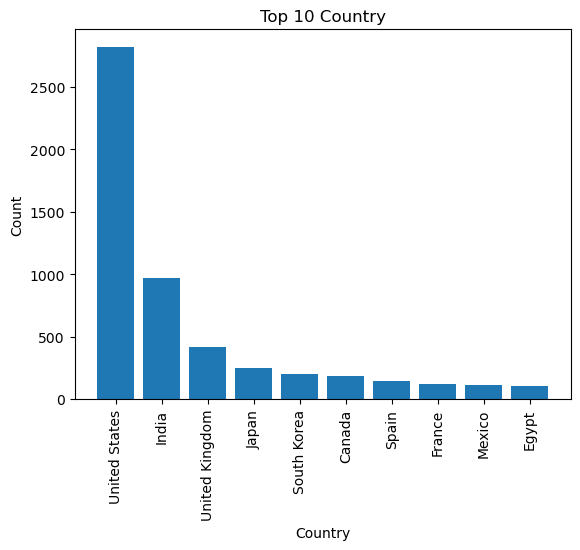

In [152]:
#top 10 Country 
grouped_data=df.groupby('country')['country'].count().sort_values(ascending=False)[:10]
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Country')
plt.xticks(rotation=90)
plt.show()

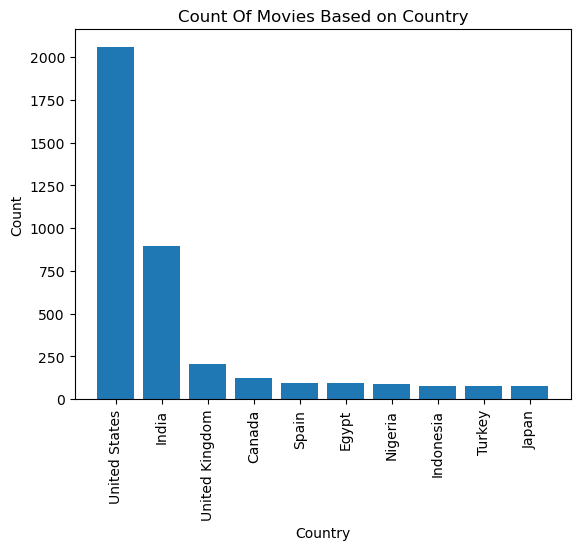

In [171]:
#top 10 country based on movies
df_movies=df[df['type']=='Movie']
grouped_data=df_movies.groupby('country')['country'].count().sort_values(ascending=False)[:10]
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Country')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Count Of Movies Based on Country")
plt.show()

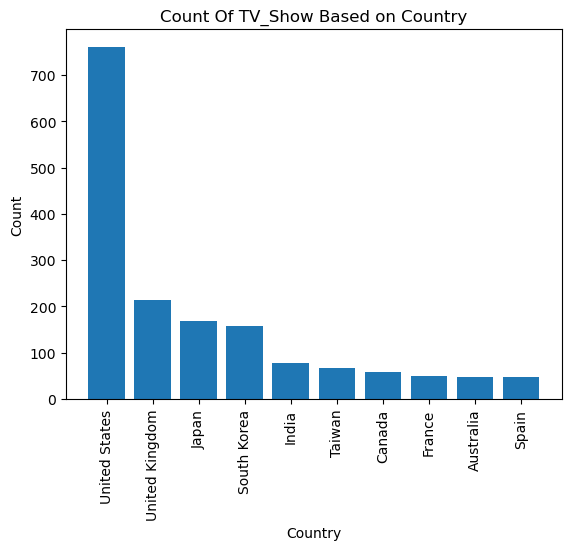

In [178]:
#top 10 Country based on tv_show
df_tv=df[df['type']=='TV Show']
grouped_data=df_tv.groupby('country')['country'].count().sort_values(ascending=False)[:10]
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Country')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Count Of TV_Show Based on Country")
plt.show()

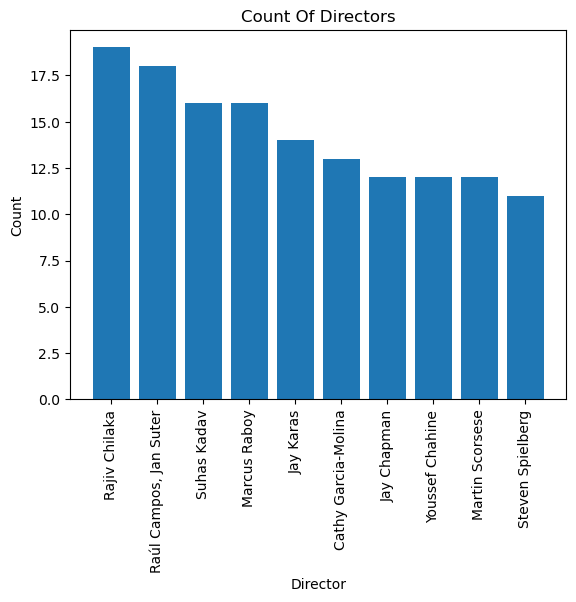

In [153]:
#top 10 director
grouped_data=df.groupby('director')['director'].count().sort_values(ascending=False)[:10]
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel("Director")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Count Of Directors")
plt.show()

In [154]:
#Aishwarya Rai Bachchan movie or tv shows
df[df['cast'].str.contains('Aishwarya Rai Bachchan')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [155]:
new_df=df.fillna("abc")

In [156]:
new_df[new_df['cast'].str.contains('Aishwarya Rai Bachchan')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1998
2544,s2545,Movie,Action Replayy,Vipul Amrutlal Shah,"Akshay Kumar, Aishwarya Rai Bachchan, Om Puri,...",India,"May 11, 2020",2010-01-01,TV-PG,129 min,"Children & Family Movies, Comedies, Internatio...","Sick of his parents’ constant squabbling, a yo...",2010
3917,s3918,Movie,Shabd,Leena Yadav,"Sanjay Dutt, Aishwarya Rai Bachchan, Zayed Kha...",India,"April 15, 2019",2005-01-01,TV-14,146 min,"Dramas, International Movies, Romantic Movies",When a novelist seeks inspiration by urging hi...,2005
4573,s4574,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,"October 1, 2018",2008-01-01,TV-14,214 min,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate...",2008
4724,s4725,Movie,Guzaarish,Sanjay Leela Bhansali,"Hrithik Roshan, Aishwarya Rai Bachchan, Sherna...",India,"August 2, 2018",2010-01-01,TV-14,121 min,"Dramas, International Movies",After an onstage disaster leaves an illusionis...,2010
5008,s5009,Movie,Guru,Mani Ratnam,"Abhishek Bachchan, Mithun Chakraborty, Aishwar...",India,"March 1, 2018",2007-01-01,TV-PG,155 min,"Dramas, International Movies",Ambitious Gurukant Desai ignores his father's ...,2007
6912,s6913,Movie,Hamara Dil Aapke Paas Hai,Satish Kaushik,"Anil Kapoor, Aishwarya Rai Bachchan, Sonali Be...",India,"March 1, 2018",2000-01-01,TV-14,158 min,"Dramas, International Movies, Music & Musicals",Love blooms when kind-hearted Avinash takes in...,2000
7249,s7250,Movie,Kyun! Ho Gaya Na,Samir Karnik,"Aishwarya Rai Bachchan, Vivek Oberoi, Amitabh ...",India,"March 1, 2018",2004-01-01,TV-PG,165 min,"International Movies, Romantic Movies",Cinematic lovebirds Aishwarya Rai and Vivek Ob...,2004
8144,s8145,Movie,Taal,Subhash Ghai,"Anil Kapoor, Aishwarya Rai Bachchan, Akshaye K...",India,"March 1, 2018",1999-01-01,TV-PG,177 min,"Dramas, International Movies, Music & Musicals",Businessman Manav falls for aspiring singer Ma...,1999


In [157]:
#for rating
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [158]:
df['rating'].nunique()

17

In [161]:
# how many movie has pg rating and it is from india
df[(df['rating']=='PG') & (df['country']=='India') & (df['type']=="Movie")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
1022,s1023,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,"April 17, 2021",2007-01-01,PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...,2007
4466,s4467,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011-01-01,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2011


In [165]:
# G rating tv_shows in year 2018
df[(df['rating']=='G') & (df['year']==2018) & (df['type']=='Movie')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
107,s108,Movie,A Champion Heart,David de Vos,"Mandy Grace, David de Vos, Donna Rusch, Devan ...",United States,"September 4, 2021",2018-01-01,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...,2018
4873,s4874,Movie,Pup Star: World Tour,Robert Vince,"Jed Ress, Makenzie Moss, Denisse Ojeda, Reggie...","Canada, Japan, United States","May 5, 2018",2018-01-01,G,87 min,"Children & Family Movies, Comedies, Music & Mu...",Talented pooches from around the world compete...,2018


In [179]:
#latest Movie or tvshow
df.sort_values(by='year',ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021-01-01,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",2021
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021-01-01,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...,2021
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021-01-01,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...,2021
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021-01-01,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...,2021
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021-01-01,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn...",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943-01-01,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,1943
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943-01-01,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,1943
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942-01-01,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,1942
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942-01-01,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,1942


In [184]:
#How many Movies are listed in the "International Movies" category?
df[df['listed_in'].str.contains('International Movies')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1993
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021-01-01,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020-01-01,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,2020
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996-01-01,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,1996
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016-01-01,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,2016
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014-01-01,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2014
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009-01-01,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2009
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015-01-01,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2015
